In [1]:
import warnings
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
movie_data = pd.read_csv("mergedMovies")

In [3]:
movie_data.head()

,Movie ID,Genre,Name,Year,Director,Cast,imDB rating
0,2,Adventure|Children's|Fantasy,Jumanji,1995,Joe Johnston,"Robin Williams, Jonathan Hyde",6.9
1,1,Animation|Children's|Comedy,Toy Story,1995,John Lasseter,"Tom Hanks, Tim Allen",8.3
2,8,Adventure|Children's,Tom and Huck,1995,Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro",5.6
3,5,Comedy,Father of the Bride Part II,1995,Charles Shyer,"Steve Martin, Diane Keaton",5.9
4,7,Comedy|Romance,Sabrina,1995,Sydney Pollack,"Harrison Ford, Julia Ormond",6.2


In [4]:
#genres = {"Action":0,"Adventure":0,"Animation":0,"Children's":0,}
genres={}
num = {}
cast=[]
director = []
for index,it in movie_data.iterrows():
    genre= it["Genre"]
    genre = genre.split("|")
    s = str(it["Cast"])
    s1 = str(it["Director"])
    cast.append(unicode(s, "utf-8"))
    director.append(unicode(s1, "utf-8"))
    for g in genre:
        genres[g] = 0;

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
vectorizer1 = CountVectorizer(min_df=1)
X_cast = vectorizer.fit_transform(cast)
cast = X_cast.toarray()
X_director = vectorizer1.fit_transform(director)
director = X_director.toarray()

In [6]:
feature = {}
features = []
for key in genres.keys():
    feature[key] = 0
for index,it in movie_data.iterrows():
    tmp_feature = feature.copy()
    genre= it["Genre"]
    genre = genre.split("|")
    for g in genre:
        tmp_feature[g] = 1
    features.append(tmp_feature)

In [7]:
measurements = []
for i in range(len(features)):
    fea = list(features[i].values())
    measurements.append(fea+list(director[i])+list(cast[i]))

In [8]:
len(measurements)

2033

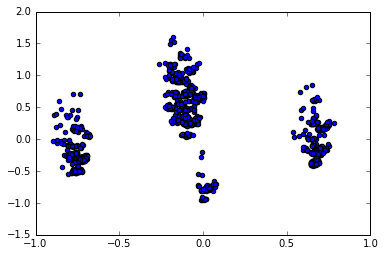

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(measurements)
measure_reduced = pca.transform(measurements)
import pylab as pl
pl.scatter(measure_reduced[:, 0], measure_reduced[:, 1])

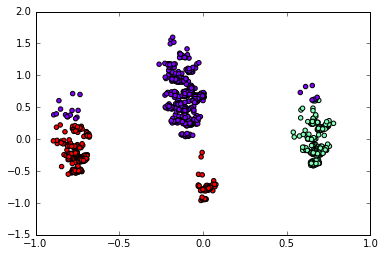

In [10]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(measure_reduced)


pl.scatter(measure_reduced[:, 0], measure_reduced[:, 1], c=k_means.labels_,
           cmap='rainbow');

3


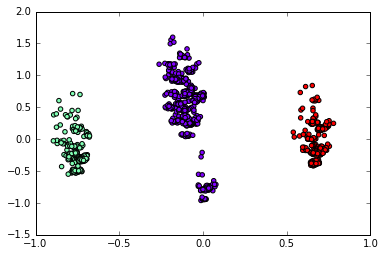

In [15]:
from sklearn.cluster import DBSCAN 
db_scan = DBSCAN(eps=0.5, min_samples=70)
db_scan.fit(measure_reduced)

print(len(set(db_scan.labels_)))
pl.scatter(measure_reduced[:, 0], measure_reduced[:, 1], c=db_scan.labels_,
           cmap='rainbow');


Obtain three clusters dataframe and write these into csv files.

In [16]:
movie_data["label"] = db_scan.labels_

In [17]:
movie_data_0 = movie_data[movie_data.label==0]
movie_data_1 = movie_data[movie_data.label==1]
movie_data_2 = movie_data[movie_data.label==2]
movie_data_0.head()
movie_data_0.to_csv("movie_set_0.csv")
movie_data_1.to_csv("movie_set_1.csv")
movie_data_2.to_csv("movie_set_2.csv")

In [18]:
len(movie_data_0)+len(movie_data_1)+len(movie_data_2)

2033

Separate ratings into three files based on movies clusters

In [19]:
names = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df = pd.read_csv("newRatings.csv", names=names, header=0)
df.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,1287,5,978302039
4,1,594,4,978302268


In [20]:
movie_df_0 = pd.read_csv("movie_set_0.csv")
movie_df_0 = movie_df_0.drop(movie_df_0.columns[0],axis=1)

movie_df_1 = pd.read_csv("movie_set_1.csv")
movie_df_1 = movie_df_1.drop(movie_df_1.columns[0],axis=1)

movie_df_2 = pd.read_csv("movie_set_2.csv")
movie_df_2 = movie_df_2.drop(movie_df_2.columns[0],axis=1)


In [21]:
first_cluster = movie_df_0["Movie ID"].tolist()
second_cluster = movie_df_1["Movie ID"].tolist()
third_cluster = movie_df_2["Movie ID"].tolist()

In [22]:
first_ratings_matrix = []
second_ratings_matrix = []
third_ratings_matrix = []
for row in df.itertuples():
    if row[2] in first_cluster:
        first_ratings_matrix.append([row[1],row[2],row[3],0])
    elif row[2] in second_cluster:
        second_ratings_matrix.append([row[1],row[2],row[3],1])  
    else:
        third_ratings_matrix.append([row[1],row[2],row[3],2]) 

Write ratings clusters into csv files.

In [25]:
import csv
with open('FirstRatingsMatrix.csv', 'a') as outcsv:   
    writer = csv.writer(outcsv, delimiter=',', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer.writerow(['UserID','MovieID','Rating','label'])
    for item in first_ratings_matrix:
        writer.writerow([item[0], item[1], item[2], item[3]])  

In [26]:
with open('SecondRatingsMatrix.csv', 'a') as outcsv:   
    writer = csv.writer(outcsv, delimiter=',', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer.writerow(['UserID','MovieID','Rating','label'])
    for item in second_ratings_matrix:
        writer.writerow([item[0], item[1], item[2], item[3]])

In [27]:
with open('ThirdRatingsMatrix.csv', 'a') as outcsv:   
    writer = csv.writer(outcsv, delimiter=',', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer.writerow(['UserID','MovieID','Rating','label'])
    for item in third_ratings_matrix:
        writer.writerow([item[0], item[1], item[2], item[3]])